# The iTunes search API

## Passing parameters in the request

In [1]:
base_site = "https://itunes.apple.com/search/"

* space is not allowed in url, for that we replace it with '+'

In [3]:
import requests
url = base_site + "?term=the+beatles&country=us"
requests.get(url)

<Response [200]>

* We can use the `requests` library to automatically incorporate the parameters into the URL
* We do that, we provide them in a dictionary form to `params`

In [5]:
r = requests.get(base_site, params = {"term": "the beatels", "country": "us"})
r.status_code

200

In [6]:
r.url

'https://itunes.apple.com/search/?term=the+beatels&country=us'

It is the same URL that we constructed manually
- This way of appending parameters is the preferred one, as it is more robust and less prone to mistakes

## Investigating the output and parameters

In [9]:
info = r.json()
print(json.dumps(info, indent=4))

{
    "resultCount": 50,
    "results": [
        {
            "wrapperType": "track",
            "kind": "song",
            "artistId": 329275,
            "collectionId": 207315427,
            "trackId": 207316133,
            "artistName": "Joe Diffie",
            "collectionName": "16 Biggest Hits: Joe Diffie",
            "trackName": "Bigger Than the Beatles",
            "collectionCensoredName": "16 Biggest Hits: Joe Diffie",
            "trackCensoredName": "Bigger Than the Beatles",
            "artistViewUrl": "https://music.apple.com/us/artist/joe-diffie/329275?uo=4",
            "collectionViewUrl": "https://music.apple.com/us/album/bigger-than-the-beatles/207315427?i=207316133&uo=4",
            "trackViewUrl": "https://music.apple.com/us/album/bigger-than-the-beatles/207315427?i=207316133&uo=4",
            "previewUrl": "https://audio-ssl.itunes.apple.com/itunes-assets/AudioPreview125/v4/5e/fc/99/5efc9994-9ef8-6ed4-ed09-946b9949cf37/mzaf_10395587702733332197.plus.a

In [10]:
info.keys()

dict_keys(['resultCount', 'results'])

This is a common format for search responses:
- the list of all results is stored in the key `results`
- the number of results is stored in `resultCount`

In [12]:
print(json.dumps(info['results'][0], indent =4))

{
    "wrapperType": "track",
    "kind": "song",
    "artistId": 329275,
    "collectionId": 207315427,
    "trackId": 207316133,
    "artistName": "Joe Diffie",
    "collectionName": "16 Biggest Hits: Joe Diffie",
    "trackName": "Bigger Than the Beatles",
    "collectionCensoredName": "16 Biggest Hits: Joe Diffie",
    "trackCensoredName": "Bigger Than the Beatles",
    "artistViewUrl": "https://music.apple.com/us/artist/joe-diffie/329275?uo=4",
    "collectionViewUrl": "https://music.apple.com/us/album/bigger-than-the-beatles/207315427?i=207316133&uo=4",
    "trackViewUrl": "https://music.apple.com/us/album/bigger-than-the-beatles/207315427?i=207316133&uo=4",
    "previewUrl": "https://audio-ssl.itunes.apple.com/itunes-assets/AudioPreview125/v4/5e/fc/99/5efc9994-9ef8-6ed4-ed09-946b9949cf37/mzaf_10395587702733332197.plus.aac.p.m4a",
    "artworkUrl30": "https://is1-ssl.mzstatic.com/image/thumb/Features115/v4/f7/69/95/f7699529-e7a5-6b5c-10b0-0f1299777f4e/dj.zeytwggc.jpg/30x30bb.jpg"

In [13]:
info["resultCount"]

50

In [14]:
r= requests.get(base_site, params = {"term":"the beatles", "country":"us", "limit":200})
r.ok

True

In [15]:
r.json()['resultCount']

172

In [16]:
r = requests.get(base_site, params = {"media":"hahaha", "term":"alternative", "country":"us"})
r.status_code

400

In [17]:
r.json()

{'errorMessage': 'Invalid value(s) for key(s): [mediaType]',
 'queryParameters': {'output': 'json',
  'callback': 'A javascript function to handle your search results',
  'country': 'ISO-2A country code',
  'limit': 'The number of search results to return',
  'term': 'A search string',
  'lang': 'ISO-2A language code'}}

- **Printing out the track name and release date of all the listed songs**

In [19]:
r= requests.get(base_site, params = {"term":"the beatles", "country":"us", "limit":200})
data = r.json()
for result in data['results']:
    #print(result.keys()) -> dict_keys(['wrapperType', 'artistId', 'collectionId', 'artistName', 'collectionName', 'collectionCensoredName', 'artistViewUrl', 'collectionViewUrl', 'artworkUrl60', 'artworkUrl100', 'collectionPrice', 'collectionExplicitness', 'trackCount', 'copyright', 'country', 'currency', 'releaseDate', 'primaryGenreName', 'previewUrl', 'description'])
    trackName = result.get('trackName', 'No trackName available')
    releaseDate = result.get('releaseDate', 'No releaseDate available')
    print(f"\n The track name of the song is {trackName}, and release date is {releaseDate}")


 The track name of the song is No trackName available, and release date is 1999-02-01T08:00:00Z

 The track name of the song is The Beatles, and release date is 1983-05-01T12:00:00Z

 The track name of the song is The Beatles, and release date is 2005-09-13T12:00:00Z

 The track name of the song is Pirates of the Caribbean: Dead Men Tell No Tales, and release date is 2017-05-26T07:00:00Z

 The track name of the song is The Beatles, and release date is 2010-03-15T12:00:00Z

 The track name of the song is Popstar: Never Stop Never Stopping, and release date is 2016-06-03T07:00:00Z

 The track name of the song is No trackName available, and release date is 2023-06-06T07:00:00Z

 The track name of the song is No trackName available, and release date is 2019-06-12T07:00:00Z

 The track name of the song is The Beatles, and release date is 2006-04-18T12:00:00Z

 The track name of the song is Bigger Than the Beatles, and release date is 1995-11-27T08:00:00Z

 The track name of the song is Bla

Further practice:
- https://sv443.net/jokeapi/v2/
- https://github.com/15Dkatz/official_joke_api

## Structering and exporting the data

In [22]:
import pandas as pd

In [23]:
songs_df = pd.DataFrame(data['results'])
songs_df

,wrapperType,artistId,collectionId,artistName,collectionName,collectionCensoredName,artistViewUrl,collectionViewUrl,artworkUrl60,artworkUrl100,...,trackRentalPrice,collectionHdPrice,trackHdPrice,trackHdRentalPrice,contentAdvisoryRating,shortDescription,longDescription,hasITunesExtras,collectionArtistName,amgArtistId
0,audiobook,2037074.0,1.646009e+09,Hunter Davies,The Beatles,The Beatles,https://books.apple.com/us/author/hunter-davie...,https://books.apple.com/us/audiobook/the-beatl...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,track,157458.0,2.824953e+08,Daniel Johnston,Yip! Jump Music,Yip! Jump Music,https://music.apple.com/us/artist/daniel-johns...,https://music.apple.com/us/album/the-beatles/2...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,track,5621730.0,1.025317e+09,Devendra Banhart,Cripple Crow,Cripple Crow,https://music.apple.com/us/artist/devendra-ban...,https://music.apple.com/us/album/the-beatles/1...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,track,NaN,1.603376e+09,Joachim Rønning & Espen Sandberg,Pirates of the Caribbean 5 Movie Collection,Pirates of the Caribbean 5 Movie Collection,NaN,https://itunes.apple.com/us/movie/pirates-of-t...,https://is1-ssl.mzstatic.com/image/thumb/Video...,https://is1-ssl.mzstatic.com/image/thumb/Video...,...,5.99,4.99,4.99,5.99,PG-13,"Thrust into an all-new adventure, a down-on-hi...","Thrust into an adventure, a down-on-his luck C...",True,NaN,NaN
4,track,27068619.0,3.907985e+08,Shy Child,Liquid Love,Liquid Love,https://music.apple.com/us/artist/shy-child/27...,https://music.apple.com/us/album/the-beatles/3...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,audiobook,782422119.0,1.691917e+09,Peter Brown & Steven Gaines,All You Need Is Love: The Beatles in Their Own...,All You Need Is Love: The Beatles in Their Own...,https://books.apple.com/us/author/peter-brown/...,https://books.apple.com/us/audiobook/all-you-n...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103313.0
168,track,4416594.0,NaN,John Lennon,NaN,NaN,https://music.apple.com/us/artist/john-lennon/...,NaN,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,2.99,9.99,9.99,2.99,R,NaN,A startling and powerful new film derived from...,NaN,NaN,NaN
169,track,255233.0,1.440630e+09,George Harrison,"Guardians of the Galaxy, Vol. 2 (Original Moti...","Guardians of the Galaxy, Vol. 2 (Original Moti...",https://music.apple.com/us/artist/george-harri...,https://music.apple.com/us/album/my-sweet-lord...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Various Artists,NaN
170,track,14190543.0,1.527127e+09,James Bourne,Safe Journey Home,Safe Journey Home,https://music.apple.com/us/artist/james-bourne...,https://music.apple.com/us/album/the-beatles/1...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
songs_df.to_csv("songs_info.csv")

In [42]:
songs_df.to_excel("songs_info.xlsx")

## Pagination

Not every JSON response would be in a suitable form for direct transformation into a table
- Many websites don't have the data on one page, instead there are many different pages. Something similar exists for APIs too
- Google for example, the search results are displayed in portions the so-called pages
- Another example: the github jobs API https://jobs.github.com/api

In [123]:
base_site  = "https://www.searchapi.io/api/v1/search"
params_0 = {
  "engine": "google_jobs",
  "api_key": "vhjRNGCH4oz2CTNLgFuqb4qv"
}
# vhjRNGCH4oz2CTNLgFuqb4qv
#"https://api.adzuna.com/v1/api/jobs/gb/search/1?app_id=d12115ce&app_key=3866c41746c540a25936602ac99e5a8d"

In [195]:
r = requests.get(base_site, params = {"engine":"google_jobs", "q":"Las Vegas", "api_key":"vhjRNGCH4oz2CTNLgFuqb4qv", "page":1})
r.status_code

200

In [197]:
len(r.json())

5

{'search_metadata': {'id': 'search_Jb65xNDvgndHnlqOR48d73q0',
  'status': 'Success',
  'created_at': '2024-11-07T16:05:31Z',
  'request_time_taken': 1.03,
  'parsing_time_taken': 0.23,
  'total_time_taken': 1.26,
  'request_url': 'https://www.google.com/search?q=Las+Vegas&oq=Las+Vegas&gl=us&hl=en&udm=8&jbr=sep:0',
  'html_url': 'https://www.searchapi.io/api/v1/searches/search_Jb65xNDvgndHnlqOR48d73q0.html',
  'json_url': 'https://www.searchapi.io/api/v1/searches/search_Jb65xNDvgndHnlqOR48d73q0'},
 'search_parameters': {'engine': 'google_jobs',
  'q': 'Las Vegas',
  'google_domain': 'google.com',
  'hl': 'en',
  'gl': 'us',
  'page': '1'},
 'search_information': {'query_displayed': 'Las Vegas',
  'detected_location': 'Las Vegas, NV'},
 'jobs': [{'position': 1,
   'title': 'VDC Engineer – Las Vegas',
   'company_name': 'McCarthy Building Companies, Inc.',
   'location': 'Las Vegas, NV',
   'via': 'via LinkedIn',
   'description': "Virtual Design and Construction Engineer\n\nVirtual Desig
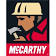
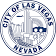
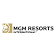
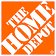
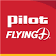
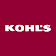

In [199]:
r.json()

In [139]:
r = requests.get(base_site, params = {"page":2})
r.status_code

401

- **NewsAPI**
- api_key = "df88bb7c2a4040efaf508b7b08d62fa2"

In [236]:
base_url = "https://newsapi.org/v2/everything"

In [318]:
params = {"q": "business",
            "apiKey":"df88bb7c2a4040efaf508b7b08d62fa2", "page":5
         }
r = requests.get(base_url, params=params)
r.ok

False

In [313]:
len(r.json()['articles'])

100

### Extracting results from multiple pages

In [316]:
results = []

In [324]:
for i in range(5):
    r = requests.get(base_url, params={"q": "business",
            "apiKey":"df88bb7c2a4040efaf508b7b08d62fa2", "page":i+1})
    if r.ok==False:
        break
    else:
        results.extend(r.json()['articles'])
                            

In [326]:
len(results)

500

In [328]:
data = pd.DataFrame(results)
data.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Daniel Cooper,Star Trek: Lower Decks bows out on business as...,The following article discusses the fifth seas...,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-10-19T20:00:17Z,"If you click 'Accept all', we and our partners..."
1,"{'id': None, 'name': '[Removed]'}",None,[Removed],[Removed],https://removed.com,None,2024-10-16T22:39:13Z,[Removed]
2,"{'id': None, 'name': 'Gizmodo.com'}",Cheryl Eddy,Here’s Wassup With That Scary Movie Reboot,"After a tease earlier this year, it's official...",https://gizmodo.com/scary-movie-reboot-wayans-...,https://gizmodo.com/app/uploads/2024/10/scarym...,2024-10-29T17:10:54Z,A few days before Halloween feels like the per...
3,"{'id': None, 'name': 'BBC News'}",None,"I was a desperate mum, says woman whose search...",Shalom Lloyd says starting her business on her...,https://www.bbc.com/news/articles/cx2y4p2pvjyo,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-10-13T05:22:12Z,Joshua Lloyd was born with severe eczema that ...
4,"{'id': None, 'name': 'BBC News'}",None,"Stolen cheddar might be heading to Russia, sup...","A supplier of cheese stolen in a £300,000 scam...",https://www.bbc.com/news/articles/c5ygw9ye90po,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-10-28T10:21:32Z,The supplier of Hafod cheddar - produced near ...


In [330]:
data.to_csv("newsapi_business.csv")

In [332]:
data.to_excel("newsapi_business.xlsx")